In [1]:
import pandas as pd

# making data frame from csv file
df = pd.read_csv("../data/ofr20181053_table1.csv", index_col ="Station")
 
# retrieving row by loc method
first = df.loc["B-14"]
second = df.loc["B-15"]

print(first, "\n\n", second)

X, in feet1                             2.346679e+06
Y, in feet1                             2.516440e+05
Change in gravity (∆G), in milliGals    2.283900e+00
Name: B-14, dtype: float64 

 X, in feet1                             2.330512e+06
Y, in feet1                             2.414830e+05
Change in gravity (∆G), in milliGals    3.744723e+01
Name: B-15, dtype: float64


In [2]:
print(df.head())

         X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals
Station                                                                
B-14         2346679       251644                              2.283900
B-15         2330512       241483                             37.447230
CER1         2358202       259877                              8.025276
CER15        2353877       260288                             -6.151253
COSO2        2330960       268320                              7.194520


In [3]:
import geopandas as gpd
from shapely.geometry import Point

# creating a geometry column 
geometry = [Point(xy) for xy in zip(df['X, in feet1'], df['Y, in feet1'])]

# Coordinate reference system : WGS84
crs = '+proj=lcc +lat_1=36 +lat_2=37.25 +lat_0=35.33333333333334 +lon_0=-119 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs'

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [4]:
print(gdf.head())

         X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals  \
Station                                                                   
B-14         2346679       251644                              2.283900   
B-15         2330512       241483                             37.447230   
CER1         2358202       259877                              8.025276   
CER15        2353877       260288                             -6.151253   
COSO2        2330960       268320                              7.194520   

                       geometry  
Station                          
B-14     POINT (2346679 251644)  
B-15     POINT (2330512 241483)  
CER1     POINT (2358202 259877)  
CER15    POINT (2353877 260288)  
COSO2    POINT (2330960 268320)  


In [5]:
gdf = gdf.to_crs('+proj=utm +zone=11 +datum=WGS84')
print(gdf.head())

         X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals  \
Station                                                                   
B-14         2346679       251644                              2.283900   
B-15         2330512       241483                             37.447230   
CER1         2358202       259877                              8.025276   
CER15        2353877       260288                             -6.151253   
COSO2        2330960       268320                              7.194520   

                                            geometry  
Station                                               
B-14     POINT (425331.1561310743 3986342.561657313)  
B-15     POINT (420342.0067203438 3983349.091962917)  
CER1     POINT (428893.4283535541 3988777.925269071)  
CER15    POINT (427578.4642187392 3988930.423427749)  
COSO2    POINT (420647.6834405417 3991521.872500391)  


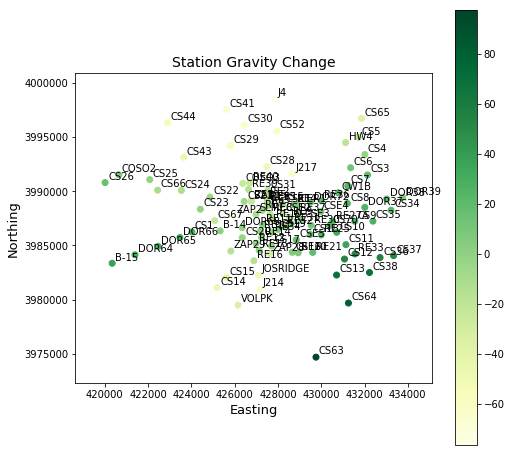

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# overall settings
fig, ax = plt.subplots(1, figsize=(8, 8))
ax = gdf.plot(column='Change in gravity (∆G), in milliGals', cmap='YlGn', ax=ax, legend=True)

# label settings
plt.xlabel('Easting', fontsize=13)
plt.ylabel('Northing', fontsize=13)

# axis settings
ax.set_title("Station Gravity Change", fontsize=14)
ax.set_autoscaley_on(False)

x_min = gdf.geometry.x.min()
x_max = gdf.geometry.x.max()
x_range = x_max - x_min

y_min = gdf.geometry.y.min()
y_max = gdf.geometry.y.max()
y_range = y_max - y_min

ax.set_xlim([x_min - x_range * 0.1, x_max + x_range * 0.1])
ax.set_ylim([y_min - y_range * 0.1, y_max + y_range * 0.1])

# y:x default is 1.0
ax.set_aspect(0.5)

# point annotations
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.index):
    annot = ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    # annot.set_visible(False)

# Problem: z size smaller than x * y (z size == x size == y size) Not 2D array
#z = pd.Series.to_numpy(gdf['Change in gravity (∆G), in milliGals'])
#z.reshape(gdf.geometry.x.size, gdf.geometry.y.size)
#plt.contour(z)
    
# save figure before showing
plt.savefig('station_gravity_change.png', dpi=1080)
plt.show()